In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [140]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [141]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


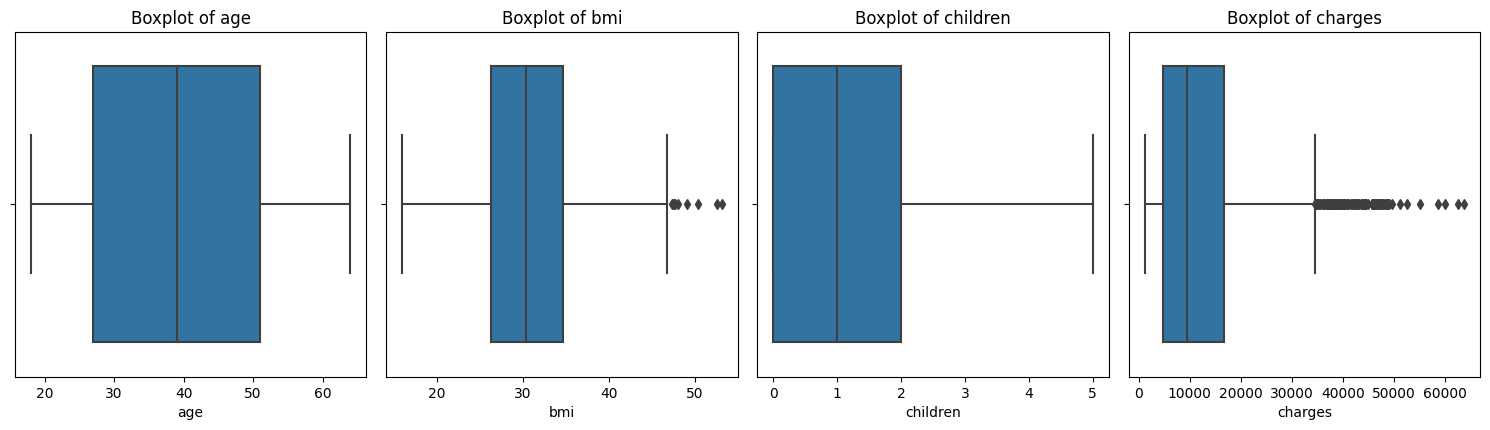

In [142]:
features = ['age', 'bmi', 'children', 'charges']


plt.figure(figsize=(15, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)  # 2 rows, 3 columns
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [143]:
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.24)
    Q3 = df[feature].quantile(0.76)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)]

    df = df.drop(outliers.index)
    df = df.reset_index(drop=True)
    return df
df.shape[0]

1338

In [144]:
df = remove_outliers(df, 'bmi')
df.shape[0]

1334

In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
x = df.drop(['charges', 'sex'], axis = 1)
x = pd.get_dummies(x, columns=['smoker', 'region'], drop_first=True)
y = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.1, random_state=0)

Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

print('The polynomial Model Score = ' + str(Pol_reg.score(x_test , y_test)) + '%')

The polynomial Model Score = 0.8699581443253177%


In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [148]:
ridge_alpha = 0.5  
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_score = ridge.score(X_test_scaled, y_test)
print('The Ridge Model Score = ' + str(ridge.score(X_test_scaled , y_test)) + '%')

The Ridge Model Score = 0.8705109992052172%
